In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#get the data from
!wget https://www.dropbox.com/s/rpfgeqhae3vz20q/BrainTumorData.zip?dl=0

--2023-12-23 07:59:30--  https://www.dropbox.com/s/rpfgeqhae3vz20q/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/rpfgeqhae3vz20q/BrainTumorData.zip [following]
--2023-12-23 07:59:30--  https://www.dropbox.com/s/raw/rpfgeqhae3vz20q/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7793219c51c988f9ef5b5a3de2.dl.dropboxusercontent.com/cd/0/inline/CJ_DVoq-DWFE7YXte9outUuWO05Xu6OdM8EYyiPrDu-EIeuRMKhekibE2ZqQKkU9-8OhTIfYJ8T6BBKHt_wH4T1jmCyB-Rj8R4XBQXBzBiSd5EtO9-5oD-NNRgmJypoQT4pmW1Ssp2YkFOW3cE8n_FdL/file# [following]
--2023-12-23 07:59:30--  https://uc7793219c51c988f9ef5b5a3de2.dl.dropboxusercontent.com/cd/0/inline/CJ_DVoq-DWFE7YXte9outUuWO05Xu6OdM8EYyiPrDu-EIeuRMKhekibE2ZqQKkU9-8OhTIfYJ8T6BB

In [ ]:
!unzip /content/BrainTumorData.zip?dl=0

Archive:  /content/BrainTumorData.zip?dl=0
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: B

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os #interaction with operating system, plays a crucial role in data preprocessing, file handeling and managing directories
import math #provide mathematical functions and operations
import shutil #higher-level interface for file operations like copying file & directories
import glob #filtering files based on pattern

In [ ]:
# count the number of images in the respective classes
ROOT_DIR = "/content/Brain Tumor Data Set/Brain Tumor Data Set"
number_of_images = {}

for dir in os.listdir(ROOT_DIR) :
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [ ]:
number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

In [ ]:
os.listdir("/content/Brain Tumor Data Set/Brain Tumor Data Set")

['Healthy', 'Brain Tumor']

# we will split the data such that
# 70% training
# 15% validation
# 15% test

In [ ]:
def dataFolder(p, split):
  # we will create a train folder
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split*number_of_images[dir])-5), replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p}Folder exists")

In [ ]:
dataFolder("train", 0.7)

In [ ]:
dataFolder("val", 0.15)

In [ ]:
dataFolder("test", 0.15)

MODEL BUILD

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import keras

In [ ]:
#CNN MODELS

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=(3,3), activation= 'relu', input_shape = (224, 224, 3)))

model.add(Conv2D(filters = 36, kernel_size=(3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units=1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

#Preparing our data using data generator

In [ ]:
def preprocessingImages1(path):

  # input : path
  # output : pre processed images

  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):

  # input : path
  # output : pre processed images

  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 5, verbose= 1, mode = 'auto')

# model check point
mc =  ModelCheckpoint(monitor="val_accuracy", filepath= "./bestmodel.h5", verbose= 1, save_best_only= True, mode = 'auto')

cd = [es,mc]

#Model Training

In [ ]:
hs = model.fit_generator(generator= train_data, steps_per_epoch= 8, epochs= 30, verbose= 1, validation_data= val_data, validation_steps= 16, callbacks= cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.7671 - accuracy: 0.5039
Epoch 1: val_accuracy improved from -inf to 0.57227, saving model to ./bestmodel.h5
8/8 [==============================] - 16s 781ms/step - loss: 0.7671 - accuracy: 0.5039 - val_loss: 0.6833 - val_accuracy: 0.5723
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6729 - accuracy: 0.6289
Epoch 2: val_accuracy improved from 0.57227 to 0.62695, saving model to ./bestmodel.h5
8/8 [==============================] - 7s 912ms/step - loss: 0.6729 - accuracy: 0.6289 - val_loss: 0.6483 - val_accuracy: 0.6270
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.7031 - accuracy: 0.5820
Epoch 3: val_accuracy improved from 0.62695 to 0.65234, saving model to ./bestmodel.h5
8/8 [==============================] - 5s 638ms/step - loss: 0.7031 - accuracy: 0.5820 - val_loss: 0.6532 - val_accuracy: 0.6523
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6734 - acc

In [ ]:

# model Graphical interpretation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

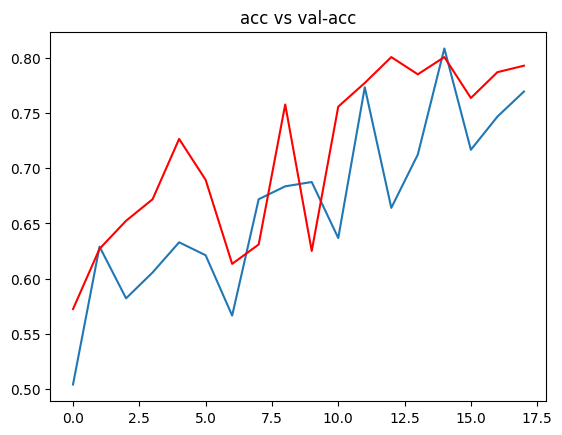

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")

plt.title("acc vs val-acc")
plt.show()

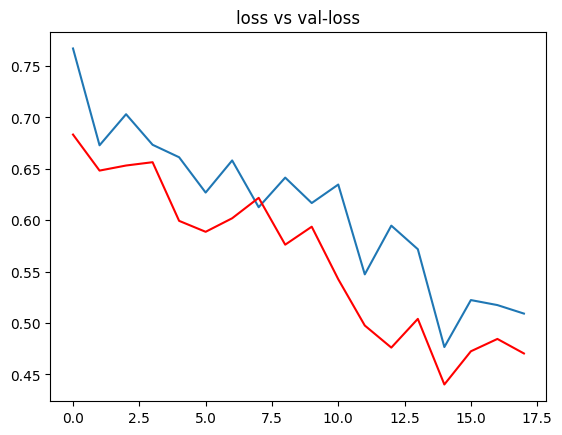

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")

plt.title("loss vs val-loss")
plt.show()

In [ ]:
#Model Accuracy
from keras.models import load_model

model = load_model("/content/bestmodel.h5")

# model Accuracy

In [ ]:
acc = model.evaluate_generator(test_data)[1]

print(f"the accuracy of our model is {acc}")

the accuracy of our model is 0.8041236996650696


In [ ]:
from matplotlib.pyplot import figure, imshow, axis

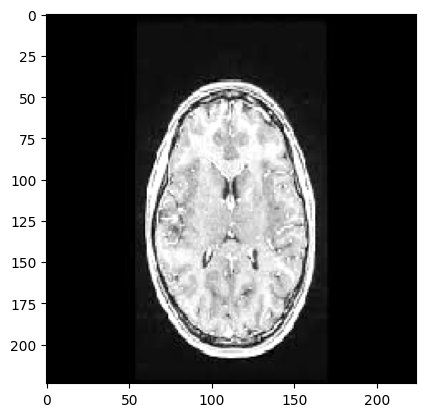

1/1 [==============================] - 0s 413ms/step
[[1]]
the MRI is not having tumor


In [ ]:
path = "/content/test/Healthy/Not Cancer  (1001).jpg"

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/225

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

# pred = model.classes(input_arr)
pred = (model.predict(input_arr) > 0.5)*1
print(pred)

if pred == 0:
  print("the MRI is having a tumor")
else:
  print("the MRI is not having tumor")

In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test_generator = test_data
Y_pred = model.predict_generator(test_generator)
Y_pred_classes = (Y_pred > 0.5).astype(int)
Y_true = test_generator.classes

In [ ]:
conf_mat = confusion_matrix(Y_true, Y_pred_classes)

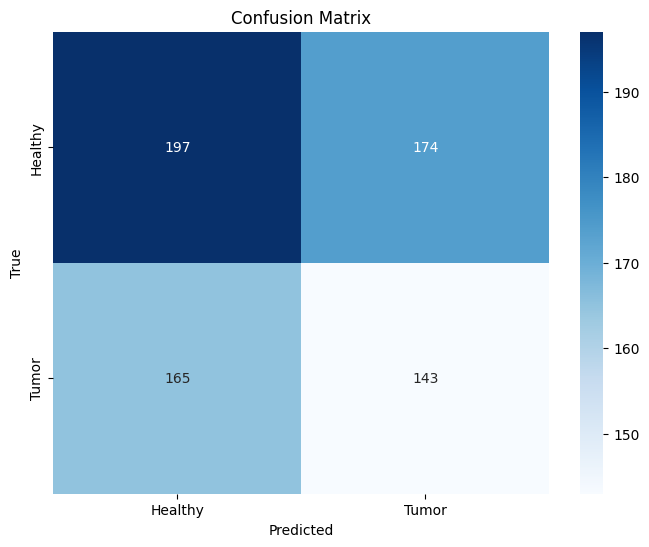

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=['Healthy', 'Tumor'], yticklabels=['Healthy', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report = classification_report(Y_true, Y_pred_classes, target_names=['Healthy', 'Tumor'])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.54      0.53      0.54       371
       Tumor       0.45      0.46      0.46       308

    accuracy                           0.50       679
   macro avg       0.50      0.50      0.50       679
weighted avg       0.50      0.50      0.50       679

